# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/compresive_strength_concrete.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


- Check Missing Values ( If Exist ; Fill each record with mean of its feature )


In [27]:
print(f'null value counts : \n{data.isnull().sum().value_counts()} \nna value counts : \n{data.isna().sum().value_counts()}')

null value counts : 
0    9
dtype: int64 
na value counts : 
0    9
dtype: int64


- Standardized the Input Variables. **Hint**: Centeralized the data


In [28]:
new_cols = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']
data.columns = new_cols

In [29]:
standardized_data = data - data.mean(axis=0)
standardized_data /= standardized_data.std(axis=0)
standardized_data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,2.471540e-15,-7.801203e-16,3.837815e-16,1.846743e-15,-9.641155e-16,6.976297e-15,1.240572e-14,4.987381e-16,2.096839e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714421e+00,-8.564718e-01,-8.467326e-01,-2.798851e+00,-1.038638e+00,-2.211064e+00,-2.239829e+00,-7.070160e-01,-2.004578e+00
25%,-8.496407e-01,-8.564718e-01,-8.467326e-01,-7.805147e-01,-1.038638e+00,-5.262618e-01,-5.317114e-01,-6.120340e-01,-7.247784e-01
50%,-7.911350e-02,-6.014861e-01,-8.467326e-01,1.607513e-01,3.269920e-02,-6.326279e-02,7.383152e-02,-2.795973e-01,-8.218499e-02
75%,6.586406e-01,8.003558e-01,1.001791e+00,4.885554e-01,6.688058e-01,7.264077e-01,6.288606e-01,1.636517e-01,6.175744e-01
max,2.476712e+00,3.309068e+00,2.279976e+00,3.064159e+00,4.351528e+00,2.213149e+00,2.731735e+00,5.055221e+00,2.800357e+00


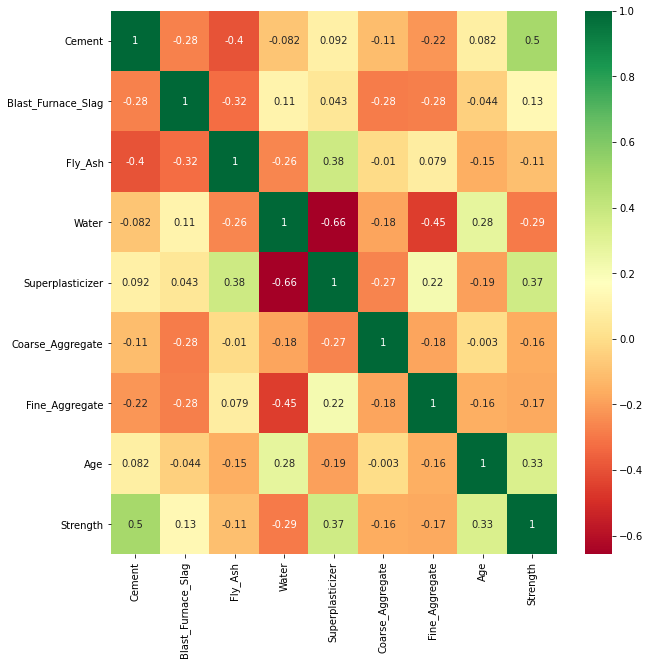

In [31]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


In [33]:
labels = data.Strength
data.drop('Strength',axis=1,inplace=True)
data.shape , labels.shape

((1030, 8), (1030,))

In [37]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data,labels,test_size=0.3)

- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

In [44]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu', input_shape=(8,)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

- Train the Model with Epochs (100) and validate it

In [50]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
all_loss_histories = []
for i in range(k):
  
  print('fold :', i)

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)

  partial_train_labels = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)

  model = build_model()

  history = model.fit( partial_train_data, partial_train_labels, validation_data=(val_data, val_labels), epochs=num_epochs , batch_size=1, verbose=0)

  mae_history = history.history['mae']
  loss_history = history.history['loss']

  all_mae_histories.append(mae_history)
  all_loss_histories.append(loss_history)

fold : 0
fold : 1
fold : 2
fold : 3


- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

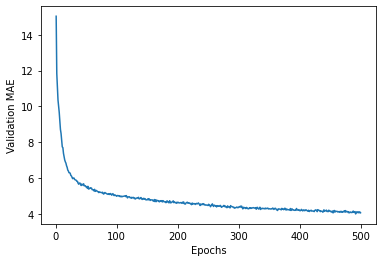

In [51]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

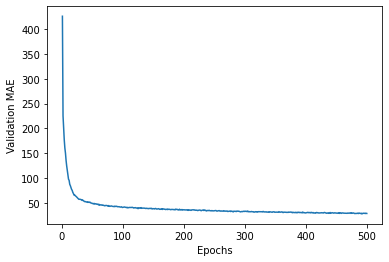

In [52]:
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- Evaluation Step
- Prediction

In [53]:
model = build_model()
history = model.fit(train_data, train_labels,epochs=500, batch_size=1, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 37.0318 - mae: 4.3445
